### Import liberaries

In [12]:
from numpy import *
from scipy.stats import norm
import numpy as np
import math
import matplotlib.pyplot as plt

### Implement of three pricing functions:
1. Black-Scholes pricing formula for European option in the function BS_european_price.
2. Monte Carlo pricing procedure for European option in the function MC_european_price.
3. Monte Carlo pricing procedure for Barrier knock-in option in the function MC_barrier_knockin_price.



## The purpose is to compute the value of European option for a non dividend paying underlying stock for both call option and put option.  Initializing the variables:


- 	Spot price of the underlying stock today: S0 = 100;
- 	Strike at expiry: K = 105;
- 	Expected return: μ=0.05;
- 	Volatility: σ=0.2;
-	Risk-free rate: r = 0.05;
-	Starting point: t = 0;
- 	Years to expiry: T = 1;
- 	Barrier drift: Sb = 110.

In [13]:
# Pricing a European option using Black-Scholes formula and Monte Carlo simulations 
# Pricing a Barrier option using Monte Carlo simulations

S0 = 100     # spot price of the underlying stock today
K = 105      # strike at expiry
mu = 0.05    # expected return
sigma = 0.2  # volatility
r = 0.05     # risk-free rate
T = 1.0      # years to expiry
Sb = 110     # barriern, drift
sigma = 0.2 # volatility

In [14]:

# Complete the following functions
def BS_european_price(S0, K, T, r, sigma):
    t = 0
    d1 = (np.log(S0/K) + (r + (sigma**2)/2)*(T-t))/(sigma*np.sqrt(T-t))
    d2 = d1 - sigma*(np.sqrt(T-t))
    
    c = norm.cdf(d1)*S0 - norm.cdf(d2)*K*(np.exp(-r*(T-t)))
    p = norm.cdf(-d2)*K*(np.exp(-r*(T-t))) - norm.cdf(-d1)*S0
    return c, p

In [15]:
def MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths):
    paths = np.zeros((numSteps+1,numPaths))
    dT = T / numSteps # time increment
    paths[0] = [S0]*numPaths
    
    for iPath in range(numPaths):
        for iStep in range(numSteps):
            paths[iStep+1,iPath] = paths[iStep,iPath]*np.exp((mu-0.5*sigma**2)*dT + sigma * np.sqrt(dT)*np.random.normal(0,1))
    
    putpayoffT = np.zeros((numPaths,1))
    callpayoffT = np.zeros((numPaths,1)) 

    for iPath in range(numPaths):
        putpayoffT[iPath] = np.maximum(K - paths[numSteps,iPath],0)*np.exp(-r*T)
        callpayoffT[iPath] = np.maximum(paths[numSteps,iPath]-K,0)*np.exp(-r*T)

      
    c = np.mean(callpayoffT)
    p = np.mean(putpayoffT)
    
    
    return c, p, paths

In [16]:
def MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths):
    paths = np.zeros((numSteps+1,numPaths))
    dT = T / numSteps # time increment
    paths[0] = [S0]*numPaths
    
    for iPath in range(numPaths):
        for iStep in range(numSteps):
            paths[iStep+1,iPath] = paths[iStep,iPath]*np.exp((mu-0.5*sigma**2)*dT + sigma * np.sqrt(dT)*np.random.normal(0,1))
    

    callpayoffT = np.zeros((numPaths,1))
    putpayoffT = np.zeros((numPaths,1))
    check = np.zeros((numPaths,1))
    
    
    for iPath in range(numPaths):
        check[iPath] = np.sum(paths[:,iPath] >= Sb)
        if check[iPath] > 0:
            putpayoffT[iPath] = np.maximum(K - paths[numSteps,iPath],0)*np.exp(-r*T)
            callpayoffT[iPath] = np.maximum(paths[numSteps,iPath]-K,0)*np.exp(-r*T)
        else:
            putpayoffT[iPath] = 0
            callpayoffT[iPath] = 0
            
    c = np.mean(callpayoffT)
    p = np.mean(putpayoffT)
    
    
    return c, p

### Price Computation

In [17]:
# Define variable numSteps to be the number of steps for multi-step MC
# numPaths - number of sample paths used in simulations

numSteps = 12; ###monthly
numPaths = 100000;

# Implement Black-Scholes pricing formula
call_BS_European_Price, putBS_European_Price = \
  BS_european_price(S0, K, T, r, sigma)

# Implement one-step Monte Carlo pricing procedure for European option
callMC_European_Price_1_step, putMC_European_Price_1_step, MC_paths_1_step = \
  MC_european_price(S0, K, T, r, mu, sigma, 1, numPaths)

# Implement multi-step Monte Carlo pricing procedure for European option
callMC_European_Price_multi_step, putMC_European_Price_multi_step, MC_paths_multi_step = \
  MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths)

# Implement one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, 1, numPaths)

# Implement  multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths)

print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price))
print('One-step MC price of an European call option is ' + str(callMC_European_Price_1_step)) 
print('One-step MC price of an European put option is ' + str(putMC_European_Price_1_step)) 
print('Multi-step MC price of an European call option is ' + str(callMC_European_Price_multi_step)) 
print('Multi-step MC price of an European put option is ' + str(putMC_European_Price_multi_step)) 
print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step)) 
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step)) 
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step))


Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455
One-step MC price of an European call option is 7.999202275450475
One-step MC price of an European put option is 7.889351979327308
Multi-step MC price of an European call option is 8.009310497504789
Multi-step MC price of an European put option is 7.891367618811152
One-step MC price of an Barrier call option is 7.83063583521649
One-step MC price of an Barrier put option is 0.0
Multi-step MC price of an Barrier call option is 8.074136695687637
Multi-step MC price of an Barrier put option is 1.2522208382241093


### Plot the result

1. For one step MC

2. For nulti step MC

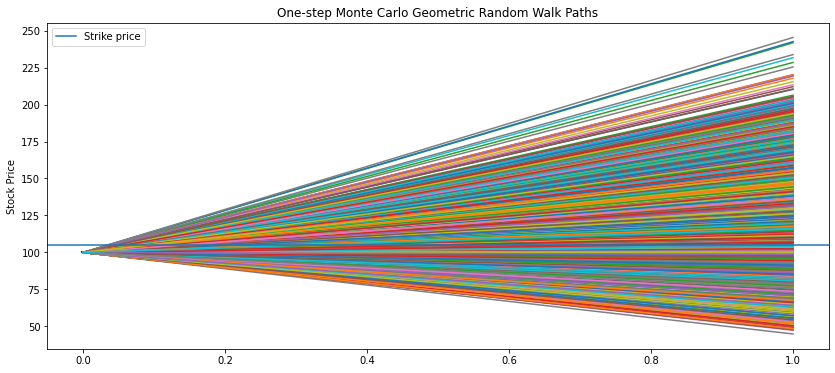

In [18]:
# Plot results
plt.figure(figsize = (14,6))
[plt.plot(MC_paths_1_step[:,i]) for i in range(numPaths)]
plt.axhline(y = K, linestyle = '-', label = 'Strike price')
plt.title('Geometric Random Walk Paths for one-step MC')
plt.title('One-step Monte Carlo Geometric Random Walk Paths')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

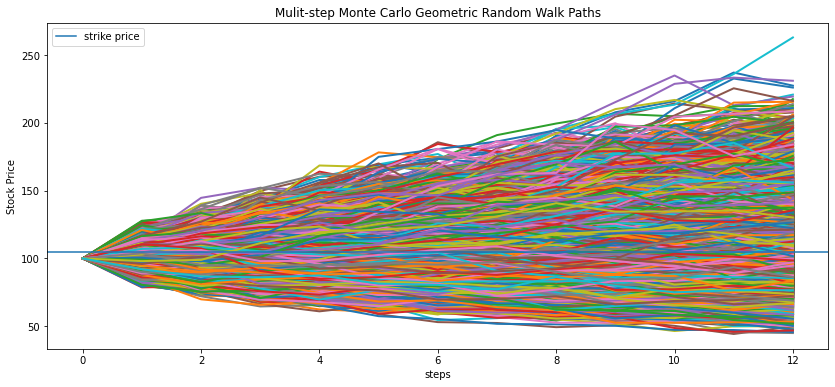

In [19]:
plt.figure(figsize = (14,6))
[plt.plot(MC_paths_multi_step[:,i], linewidth=2) for i in range(numPaths)]
plt.axhline(y = K, linestyle = '-', label = 'strike price')
plt.title('Mulit-step Monte Carlo Geometric Random Walk Paths')
plt.ylabel('Stock Price')
plt.xlabel('steps')
plt.legend()
plt.show()

### Price Computation of Barrier options with volatility increased and decreased by 10% from the original inputs. 

In [ ]:
# one-step Monte Carlo pricing procedure for Barrier option with volatility increased by 10%
callMC_Barrier_Knockin_Price_1_stepin, putMC_Barrier_Knockin_Price_1_stepin = \
 MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*1.1, 1, numPaths)

# multi-step Monte Carlo pricing procedure for Barrier option with volatility increased by 10%
callMC_Barrier_Knockin_Price_multi_stepin, putMC_Barrier_Knockin_Price_multi_stepin = \
 MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*1.1, numSteps, numPaths)

# one-step Monte Carlo pricing procedure for Barrier option with volatility decreased by 10%
callMC_Barrier_Knockin_Price_1_stepde, putMC_Barrier_Knockin_Price_1_stepde = \
 MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*0.9, 1, numPaths)

# multi-step Monte Carlo pricing procedure for Barrier option with volatility decreased by 10%
callMC_Barrier_Knockin_Price_multi_stepde, putMC_Barrier_Knockin_Price_multi_stepde = \
 MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*0.9, numSteps, numPaths)

print('One-step MC price of an Barrier call option with volatility increased by 10% is ' + str(callMC_Barrier_Knockin_Price_1_stepin)) 
print('One-step MC price of an Barrier put option with volatility increased by 10% is ' + str(putMC_Barrier_Knockin_Price_1_stepin)) 
print('Multi-step MC price of an Barrier call option with volatility increased by 10% is ' + str(callMC_Barrier_Knockin_Price_multi_stepin)) 
print('Multi-step MC price of an Barrier put option with volatility increased by 10% is ' + str(putMC_Barrier_Knockin_Price_multi_stepin)) 
print('One-step MC price of an Barrier call option with volatility decreased by 10% is ' + str(callMC_Barrier_Knockin_Price_1_stepde)) 
print('One-step MC price of an Barrier put option with volatility decreased by 10% is ' + str(putMC_Barrier_Knockin_Price_1_stepde)) 
print('Multi-step MC price of an Barrier call option with volatility decreased by 10% is ' + str(callMC_Barrier_Knockin_Price_multi_stepde)) 
print('Multi-step MC price of an Barrier put option with volatility decreased by 10% is ' + str(putMC_Barrier_Knockin_Price_multi_stepde))


One-step MC price of an Barrier call option with volatility increased by 10% is 8.645120335414923
One-step MC price of an Barrier put option with volatility increased by 10% is 0.0
Multi-step MC price of an Barrier call option with volatility increased by 10% is 8.732596461791875
Multi-step MC price of an Barrier put option with volatility increased by 10% is 1.6080495966687534
One-step MC price of an Barrier call option with volatility decreased by 10% is 6.967330515512397
One-step MC price of an Barrier put option with volatility decreased by 10% is 0.0
Multi-step MC price of an Barrier call option with volatility decreased by 10% is 7.127201826398087
Multi-step MC price of an Barrier put option with volatility decreased by 10% is 0.973235584448095


### Procedure for choosing a number of time steps and a number of scenarios in Monte Carlo pricing for European option to get the same price (up to the cent) as given by the Black-Scholes formula.

In [ ]:
numPaths_list = [1000,10000,50000,100000,500000]
numSteps_list = [12, 52, 252]#monthly, weekly, daily
call_BS_European_Price, put_BS_European_Price = BS_european_price(S0, K, T, r, sigma)
print('call price of Black-Scholes =',call_BS_European_Price)
print('put price of Black-Scholes =',put_BS_European_Price)
residual_call_optimal, residual_put_optimal = 0.01, 0.01

for numPaths in numPaths_list:
    for numSteps in numSteps_list:
        callMC_European_Price_multi_step, putMC_European_Price_multi_step, MC_paths_multi_step = MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths)
    
        call_residual = abs(callMC_European_Price_multi_step -call_BS_European_Price)
        put_residual = abs(putMC_European_Price_multi_step-put_BS_European_Price)
        if call_residual < 0.01:
            print('For',numSteps,'steps and',numPaths,'paths,Monte Carlo pricing for European option get nearly the same price with Black-Scholes in call option')
            print('Call option price of Monte Carlo in European option =',callMC_European_Price_multi_step,'the difference between estimation and  Black-Scholes is', abs(callMC_European_Price_multi_step - call_BS_European_Price))
        if call_residual < residual_call_optimal:##set residual call optimal and residual put optimal as 0.01 for same result
            residual_call_optimal = call_residual
            num_path_call_optimal = numPaths
            num_step_call_optimal = numSteps
            callMC_optimal = callMC_European_Price_multi_step
           
        if put_residual < 0.01:
            print('For',numSteps,'steps and',numPaths,'paths,Monte Carlo pricing for European option get nearly the same price with Black-Scholes in put option')
            print('put option price of Monte Carlo in European option =',putMC_European_Price_multi_step,'the difference between estimation and  Black-Scholes is', abs(putMC_European_Price_multi_step - put_BS_European_Price), '\n')
        if put_residual < residual_put_optimal:
            residual_put_optimal = put_residual
            num_path_put_optimal = numPaths
            num_step_put_optimal = numSteps
            putMC_optimal = putMC_European_Price_multi_step
           
            

print('----------------------------------------------------')
print('call price of Black-Scholes =',call_BS_European_Price)
print('put price of Black-Scholes =',put_BS_European_Price)            
print('Optimal MC price of European call option is ' + str(callMC_optimal)) 
print('Optimal MC price of European put option is ' + str(putMC_optimal))
print('Optimal Number of Path is ' + str(num_path_call_optimal))
print('Optimal Number of Steps is ' + str(num_step_call_optimal))

call price of Black-Scholes = 8.021352235143176
put price of Black-Scholes = 7.9004418077181455
For 12 steps and 10000 paths,Monte Carlo pricing for European option get nearly the same price with Black-Scholes in put option
put option price of Monte Carlo in European option = 7.90430793954824 the difference between estimation and  Black-Scholes is 0.0038661318300947656 

For 252 steps and 10000 paths,Monte Carlo pricing for European option get nearly the same price with Black-Scholes in call option
Call option price of Monte Carlo in European option = 8.029243157695284 the difference between estimation and  Black-Scholes is 0.007890922552107327
For 12 steps and 50000 paths,Monte Carlo pricing for European option get nearly the same price with Black-Scholes in put option
put option price of Monte Carlo in European option = 7.899601634506144 the difference between estimation and  Black-Scholes is 0.0008401732120013605 

For 252 steps and 50000 paths,Monte Carlo pricing for European optio


We can observe when number of steps is 12(monthly basis) and number of path is 500000, the difference between the two model in both call option and put option is very small, only 0.002 in call option and 0.001 in put option(There are smaller difference in only put or call option in other number of paths, like 0.0008 in put option under 12 steps and 50000 paths, but the difference in call option is not small enough under the same scenarios). We can assume that the larger the number of paths, the smaller the difference between the two model can be, and pattern of number of steps is not obvious given the output we have know. Note, the larger the number of path and number of steps is, the longer the computation time will take. 
